In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.shape

(200, 5)

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

### EDA

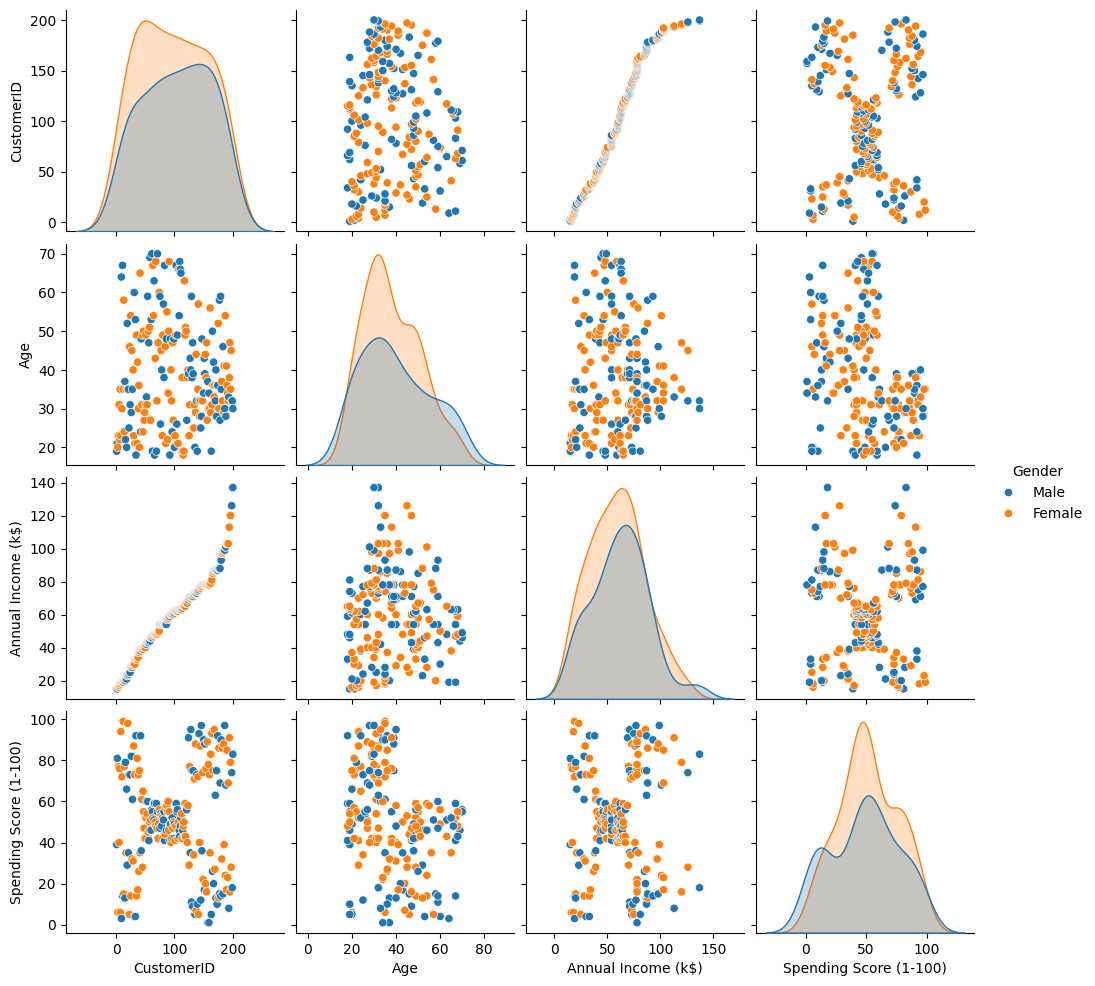

In [8]:
sns.pairplot(df, hue='Gender')

Correlations

-Positive correlation means both variables move together in the same direction. If one increases other also increases
-Negative correlation means one variable increases while the other decreases.

In [9]:
corr = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
corr

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

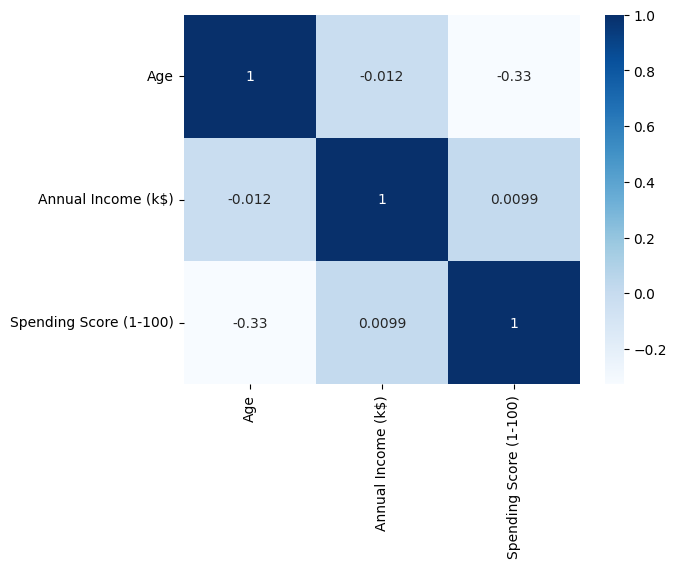

In [10]:
sns.heatmap(corr, annot=True, cmap='Blues')

<Axes: >

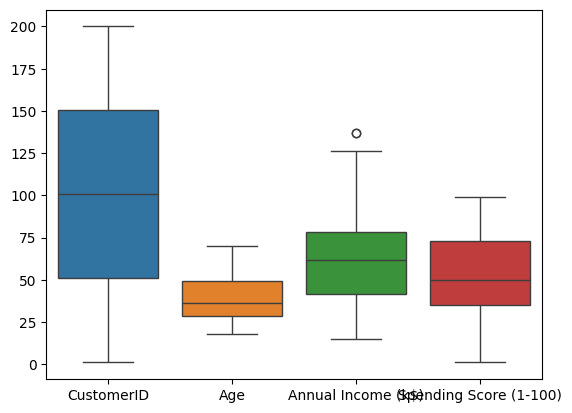

In [11]:
sns.boxplot(df)

<Axes: xlabel='Age', ylabel='Count'>

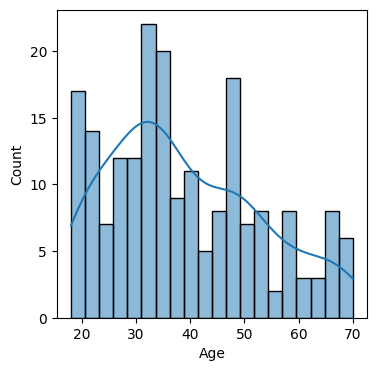

In [12]:
plt.figure(figsize =(4, 4))
sns.histplot(df['Age'], kde=True, bins=20)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

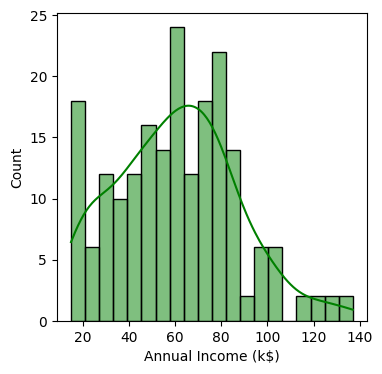

In [13]:
plt.figure(figsize =(4, 4))
sns.histplot(df['Annual Income (k$)'],bins=20, kde=True, color='green')

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

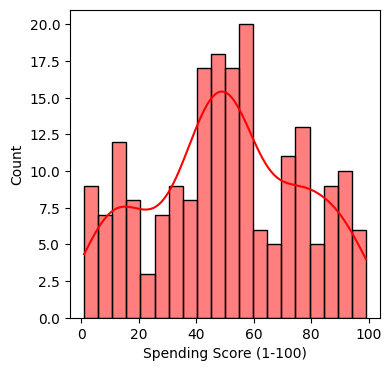

In [14]:
plt.figure(figsize =(4, 4))
sns.histplot(df['Spending Score (1-100)'],bins=20, kde=True, color='red')

<Axes: xlabel='count', ylabel='Gender'>

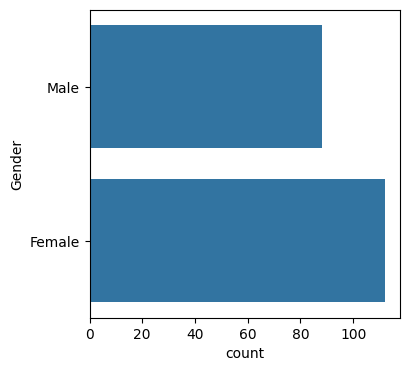

In [15]:
plt.figure(figsize =(4, 4))
sns.countplot(df['Gender'])

### Standardization of Data 

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled_data = sc.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]) 

### Elbow Method - for number of clusters

In [20]:
from sklearn.cluster import KMeans

WCSS = []  # Inertia
K = range(1, 11)
for i in K:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    WCSS.append(kmeans.inertia_)

In [21]:
WCSS

[600.0,
 389.3861889564371,
 295.45624492135573,
 205.22514747675922,
 169.89149793438588,
 134.3527747740149,
 121.38935022502872,
 113.72723000071333,
 102.1362384432925,
 92.55027231838781]

C:\Users\Hammad\AppData\Local\Temp\ipykernel_5728\3010103862.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, WCSS, 'bo-', color='blue')


Text(0, 0.5, 'Inertia')

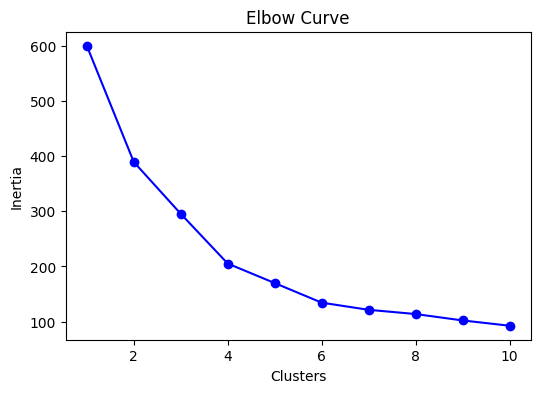

In [30]:
plt.figure(figsize=(6,4))
plt.plot(K, WCSS, 'bo-', color='blue')
plt.title("Elbow Curve")
plt.xlabel("Clusters")
plt.ylabel("Inertia")

### Training the Kmeans clustering model

In [71]:
kmeans = KMeans(n_clusters=5, random_state=42)

y = kmeans.fit_predict(scaled_data)   # return a label based on their cluster on each data point 

y

array([2, 2, 3, 2, 2, 2, 3, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       0, 2, 0, 3, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 1, 1, 3, 1, 4, 1, 4, 1, 4, 1,
       3, 1, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [72]:
df['Cluster'] = y

In [73]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [74]:
df['Cluster'].value_counts()

Cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64

In [75]:
kmeans.cluster_centers_

array([[ 1.17882975, -0.49388609, -0.32971553],
       [-0.42880597,  0.97484722,  1.21608539],
       [-0.93876351, -1.31473131,  0.95680216],
       [-0.86957306, -0.23851652, -0.36060916],
       [ 0.39737911,  1.11508909, -1.23126963]])

In [76]:
kmeans.n_iter_

7

### Visualization

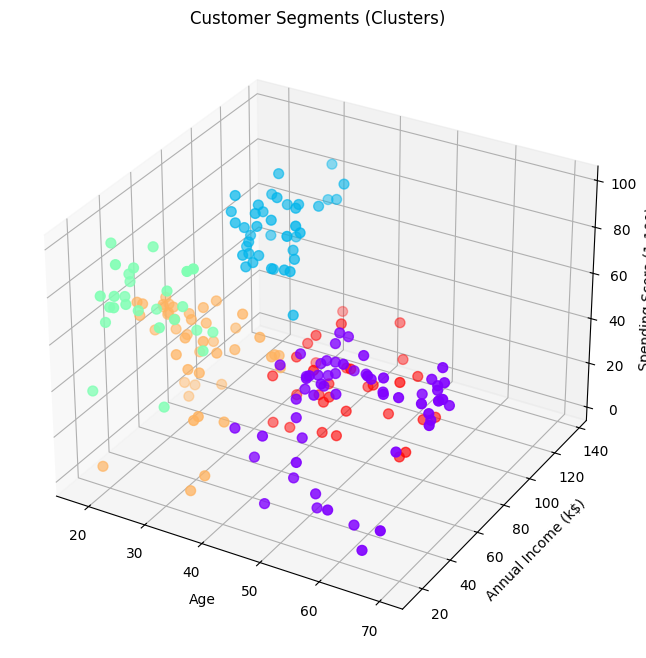

In [77]:
fig = plt.figure(figsize=(10, 8))         # 3D Plot of Clusters using Age, Annual Income, and Spending Score
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], 
           c=df['Cluster'], cmap='rainbow', s=50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer Segments (Clusters)')
plt.show()

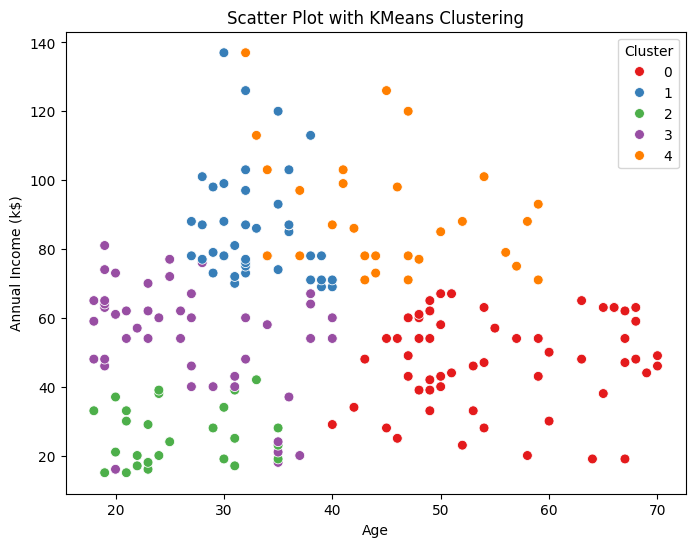

In [90]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['Cluster'], palette='Set1', s=50)
plt.title('Scatter Plot with KMeans Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

plt.show()

### Silhouette Score

In [91]:
from sklearn.metrics import silhouette_score

sil = silhouette_score(scaled_data, df['Cluster'])

print(sil)

0.40846873777345605
